In [359]:
import pandas as pd
# Import the function from the src folder
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from visualization import create_bar_chart,create_line_chart
from utils import get_categorical_columns,get_numerical_columns,get_boolean_columns

from sklearn.preprocessing import LabelEncoder



In [360]:
data=pd.read_csv("../data/processed/data_cleaned.csv")
data["AR"] = data["AR"].astype('string')

In [361]:
categorical_features=get_categorical_columns(data)
numerical_features=get_numerical_columns(data)
boolean_features=get_boolean_columns(data)
numerical_features

['warning_count']

## Data imbalance check

In [362]:

for category in categorical_features:
    create_bar_chart(data,category)
    print(data[category].value_counts(normalize=True)*100)



AR
0    65.700141
1    34.299859
Name: proportion, dtype: Float64


payment_method
method1    78.066276
method2     7.496464
method3     7.415640
method4     7.021621
Name: proportion, dtype: float64


client_first_lapp_mark
no     50.717317
yes    49.282683
Name: proportion, dtype: float64


client_first_manual_lapp_mark
yes    82.056981
no     17.943019
Name: proportion, dtype: float64


In [363]:
for category in boolean_features:
    
    print(data[category].value_counts(normalize=True)*100)
    print()
    

address_check_1
False    99.878763
True      0.121237
Name: proportion, dtype: float64

address_check_2
False    95.029299
True      4.970701
Name: proportion, dtype: float64

address_check_3
False    99.86866
True      0.13134
Name: proportion, dtype: float64

address_check_4
False    95.019196
True      4.980804
Name: proportion, dtype: float64

accounts_check_5
False    99.818145
True      0.181855
Name: proportion, dtype: float64

accounts_check_6
False    96.52455
True      3.47545
Name: proportion, dtype: float64

data_comparison_7
False    99.515054
True      0.484946
Name: proportion, dtype: float64

data_comparison_8
False    99.070519
True      0.929481
Name: proportion, dtype: float64

data_comparison_9
False    97.393413
True      2.606587
Name: proportion, dtype: float64

data_comparison_10
False    99.929279
True      0.070721
Name: proportion, dtype: float64

data_comparison_11
True     58.698727
False    41.301273
Name: proportion, dtype: float64

data_comparison_12
Fal

#### Data Imbalance

##### 1. AR Data Imbalance
- **Findings:** In the dataset, `AR` indicates the approval status where `0` means approved and `1` means rejected. The distribution is as follows:
  - **Approved Applications:** 65.7% (Most common)
  - **Rejected Applications:** 34.3%

##### 2. Payment Methods Data Imbalance
- **Findings:** Payment Method 1 is the most common payment method used for loan applications. The remaining methods are used at almost equal levels. The distribution of payment methods is as follows:
  - **Payment Method 1:** 78.1% (Most common)
  - **Payment Method 2:** 7.5%
  - **Payment Method 3:** 7.4%
  - **Payment Method 4:** 7.0%

##### 3. `client_first_lapp_mark` Data Imbalance
- **Findings:** The `client_first_lapp_mark` indicates whether it is the client's first loan application. The distribution is nearly balanced between first-time and returning applicants. The distribution is as follows:
  - **First Loan Application:** 50.7% (Slightly more common)
  - **Not the First Loan Application:** 49.3%

##### 4. `client_first_manual_lapp_mark` Data Imbalance
- **Findings:** The `client_first_manual_lapp_mark` indicates whether the client's first loan application reached the manual processing stage. There are significantly more applications that reached the manual process compared to those that did not. The distribution is as follows:
  - **Reached Manual Process:** 82.1% (Most common)
  - **Did Not Reach Manual Process:** 17.9%

#### Data Check Columns Analysis

##### 1. High Proportion of `False` Values
Many boolean columns have an overwhelming majority of `False` values. For example:
- **`address_check_1`**: 99.88% `False`
- **`address_check_2`**: 95.03% `False`
- **`accounts_check_5`**: 99.82% `False`
- **`data_comparison_7`**: 99.52% `False`
- **`data_comparison_10`**: 99.93% `False`
- **`other_21`**: 99.05% `False`
- **`other_22`**: 99.98% `False`

##### 2. High Proportion of `True` Values
A few columns have a higher proportion of `True` values, indicating they might be more informative:
- **`data_comparison_11`**: 58.70% `True`
- **`data_comparison_12`**: 39.39% `True`
- **`data_comparison_13`**: 31.78% `True`
- **`data_quality_25`**: 35.81% `True`
- **`data_quality_27`**: 29.28% `True`
- **`data_quality_28`**: 9.80% `True`
- **`creditcard_check_18`**: 18.59% `True`
- **`accounts_check_38`**: 7.56% `True`

### Suggestions on Fields to Keep

Based on the proportion of `True` values, the following fields are likely to be more useful:

- **`data_comparison_11`**: Significant amount of `True` values (58.70%)
- **`data_comparison_12`**: Useful with 39.39% `True` values
- **`data_comparison_13`**: Somewhat informative with 31.78% `True` values
- **`data_quality_25`**: Relevant with 35.81% `True` values
- **`data_quality_27`**: Worth keeping with 29.28% `True` values
- **`data_quality_28`**: Potentially important with 9.80% `True` values
- **`creditcard_check_18`**: Useful for credit card analysis with 18.59% `True` values
- **`accounts_check_38`**: Relevant with 7.56% `True` values

### Fields to Consider Dropping

The following fields have a very high proportion of `False` values and may be less useful:

- **`address_check_1`**, **`address_check_2`**, **`address_check_3`**, **`address_check_4`**, **`accounts_check_5`**, **`data_comparison_7`**, **`data_comparison_8`**, **`data_comparison_9`**, **`data_comparison_10`**, **`other_21`**, **`other_22`**, **`data_quality_19`**, **`data_quality_20`**, **`other_29`**, **`data_quality_30`**, **`other_31`**, **`data_quality_32`**, **`data_quality_33`**, **`data_quality_34`**, **`data_quality_35`**, **`other_36`**, **`accounts_check_37`**.

These fields have a minimal presence of `True` values, suggesting they might not contribute significantly to the analysis.

### Summary

- **Focus** on fields with a higher proportion of `True` values as they are more likely to provide actionable insights.
- **Consider dropping** fields with an overwhelming majority of `False` values, as they might not add substantial value to the analysis.


## Drop irrelevant fields

In [364]:
fields_to_drop = ["address_check_1", "address_check_2", "address_check_3", "address_check_4", "accounts_check_5", "data_comparison_7", "data_comparison_8", "data_comparison_9", "data_comparison_10", "other_21", "other_22", "data_quality_19", "data_quality_20", "other_29", "data_quality_30", "other_31", "data_quality_32", "data_quality_33", "data_quality_34", "data_quality_35", "other_36", "accounts_check_37"]
data.drop(fields_to_drop, inplace = True, axis = 1)

# Bivariate analysis


## Categorical Features

In [365]:
for category in categorical_features:
    if category != "AR":
        create_bar_chart(data,category,"AR")
    

### Univariate Analysis of Categorical Variables Based on AR Target

### Payment Method
- **Findings:** Method 1 is the most commonly used payment method, with a higher number of both approved and rejected applications compared to other methods. Method 4 has the least disparity between approved and rejected applications.The distribution is as follows:
  - **Method 1:**
    - Approved: 5,120
    - Rejected: 2,607
  - **Method 2:**
    - Approved: 502
    - Rejected: 240
  - **Method 3:**
    - Approved: 524
    - Rejected: 210
  - **Method 4:**
    - Approved: 357
    - Rejected: 338

### `client_first_lapp_mark`
- **Findings:** The distribution of loan applications for first-time clients (`Yes`) and returning clients (`No`) is fairly balanced, with a slightly higher number of approvals and rejections for first-time clients. The distribution is as follows:

  - **No:**
    - Approved: 3,207
    - Rejected: 1,813
  - **Yes:**
    - Approved: 3,296
    - Rejected: 1,582
### `client_first_manual_lapp_mark`
- **Findings:**  A significant majority of applications that reached the manual processing stage for the first time (`Yes`) were approved. The number of both approved and rejected applications is substantially higher for first-time manual process applications compared to those that did not reach the manual process.The distribution is as follows:
  - **No:**
    - Approved: 1,026
    - Rejected: 750
  - **Yes:**
    - Approved: 5,477
    - Rejected: 2,645
 



## Numerical Features

In [366]:
create_line_chart(data,"warning_count","AR")

### Univariate Analysis of Numerical Variables Based on AR Target

### Warning Count
- **Findings:** The approval rate increases from 0 to 4 warning counts, with 4 warning counts having the highest number of approved loans (1,205). Beyond 4 warning counts, the number of approved loans decreases. Conversely, the number of rejected loans increases from 0 to 6 warning counts, with 6 warning counts having the highest number of rejected loans (557). Beyond 6 warning counts, the number of rejected loans decreases.


## Boolean Features

In [367]:
boolean_features=get_boolean_columns(data)

for category in boolean_features:
    data_check=data.groupby([category,"AR"]).size().reset_index(name='Count')
    print(data_check)

   accounts_check_6 AR  Count
0             False  0   6279
1             False  1   3275
2              True  0    224
3              True  1    120
   data_comparison_11 AR  Count
0               False  0   2711
1               False  1   1377
2                True  0   3792
3                True  1   2018
   data_comparison_12 AR  Count
0               False  0   3869
1               False  1   2130
2                True  0   2634
3                True  1   1265
   data_comparison_13 AR  Count
0               False  0   4498
1               False  1   2254
2                True  0   2005
3                True  1   1141
   data_comparison_14 AR  Count
0               False  0   6411
1               False  1   3217
2                True  0     92
3                True  1    178
   data_comparison_15 AR  Count
0               False  0   4965
1               False  1   2571
2                True  0   1538
3                True  1    824
   creditcard_check_16 AR  Count
0                

### Univariate Analysis of Categorical Variables Based on AR Target

### `accounts_check_6`
- **Findings:** 
  - When `accounts_check_6` is `False`, the majority of applications are approved (6,279) compared to rejected applications (3,275).
  - When `accounts_check_6` is `True`, the number of approved applications (224) is still higher than the rejected applications (120). The distribution is as follows:
    - **False:**
      - Approved: 6,279
      - Rejected: 3,275
    - **True:**
      - Approved: 224
      - Rejected: 120

### `data_comparison_11`
- **Findings:** 
  - When `data_comparison_11` is `False`, there are more approved (2,711) than rejected applications (1,377).
  - When `data_comparison_11` is `True`, the number of approved applications (3,792) is higher than rejected applications (2,018). The distribution is as follows:
    - **False:**
      - Approved: 2,711
      - Rejected: 1,377
    - **True:**
      - Approved: 3,792
      - Rejected: 2,018

### `data_comparison_12`
- **Findings:** 
  - When `data_comparison_12` is `False`, the number of approved applications (3,869) is higher than rejected applications (2,130).
  - When `data_comparison_12` is `True`, the number of approved applications (2,634) is still higher than rejected applications (1,265). The distribution is as follows:
    - **False:**
      - Approved: 3,869
      - Rejected: 2,130
    - **True:**
      - Approved: 2,634
      - Rejected: 1,265

### `data_comparison_13`
- **Findings:** 
  - When `data_comparison_13` is `False`, the number of approved applications (4,498) is higher than rejected applications (2,254).
  - When `data_comparison_13` is `True`, the number of approved applications (2,005) is higher than rejected applications (1,141). The distribution is as follows:
    - **False:**
      - Approved: 4,498
      - Rejected: 2,254
    - **True:**
      - Approved: 2,005
      - Rejected: 1,141

### `data_comparison_14`
- **Findings:** 
  - When `data_comparison_14` is `False`, the number of approved applications (6,411) is much higher than the rejected applications (3,217).
  - When `data_comparison_14` is `True`, the number of approved applications (92) is substantially lower than the rejected applications (178). The distribution is as follows:
    - **False:**
      - Approved: 6,411
      - Rejected: 3,217
    - **True:**
      - Approved: 92
      - Rejected: 178

### `data_comparison_15`
- **Findings:** 
  - When `data_comparison_15` is `False`, the number of approved applications (4,965) is higher than rejected applications (2,571).
  - When `data_comparison_15` is `True`, the number of approved applications (1,538) is higher than rejected applications (824). The distribution is as follows:
    - **False:**
      - Approved: 4,965
      - Rejected: 2,571
    - **True:**
      - Approved: 1,538
      - Rejected: 824

### `creditcard_check_16`
- **Findings:** 
  - When `creditcard_check_16` is `False`, the number of approved applications (6,403) is significantly higher than rejected applications (3,201).
  - When `creditcard_check_16` is `True`, the number of approved applications (100) is much lower compared to the rejected applications (194). The distribution is as follows:
    - **False:**
      - Approved: 6,403
      - Rejected: 3,201
    - **True:**
      - Approved: 100
      - Rejected: 194

### `creditcard_check_17`
- **Findings:** 
  - When `creditcard_check_17` is `False`, the number of approved applications (6,498) is higher than rejected applications (3,393).
  - When `creditcard_check_17` is `True`, the number of approved applications (5) is hihger when compared to rejected applications (2). The distribution is as follows:
    - **False:**
      - Approved: 6,498
      - Rejected: 3,393
    - **True:**
      - Approved: 5
      - Rejected: 2

### `creditcard_check_18`
- **Findings:** 
  - When `creditcard_check_18` is `False`, the number of approved applications (5,727) is higher than rejected applications (2,331).
  - When `creditcard_check_18` is `True`, the number of approved applications (776) is lower compared to the rejected applications (1,064). The distribution is as follows:
    - **False:**
      - Approved: 5,727
      - Rejected: 2,331
    - **True:**
      - Approved: 776
      - Rejected: 1,064

### `data_quality_23`
- **Findings:** 
  - When `data_quality_23` is `False`, the number of approved applications (6,214) is higher than rejected applications (3,268).
  - When `data_quality_23` is `True`, the number of approved applications (289) is higher compared to rejected applications (127). The distribution is as follows:
    - **False:**
      - Approved: 6,214
      - Rejected: 3,268
    - **True:**
      - Approved: 289
      - Rejected: 127

### `data_quality_24`
- **Findings:** 
  - When `data_quality_24` is `False`, the number of approved applications (6,244) is higher than rejected applications (3,175).
  - When `data_quality_24` is `True`, the number of approved applications (259) is higher compared to rejected applications (220). The distribution is as follows:
    - **False:**
      - Approved: 6,244
      - Rejected: 3,175
    - **True:**
      - Approved: 259
      - Rejected: 220

### `data_quality_25`
- **Findings:** 
  - When `data_quality_25` is `False`, the number of approved applications (4,160) is higher than rejected applications (2,194).
  - When `data_quality_25` is `True`, the number of approved applications (2,343) is higher than rejected applications (1,201). The distribution is as follows:
    - **False:**
      - Approved: 4,160
      - Rejected: 2,194
    - **True:**
      - Approved: 2,343
      - Rejected: 1,201

### `data_quality_26`
- **Findings:** 
  - When `data_quality_26` is `False`, the number of approved applications (6,367) is significantly higher than rejected applications (3,334).
  - When `data_quality_26` is `True`, the number of approved applications (136) is much higher compared to rejected applications (61). The distribution is as follows:
    - **False:**
      - Approved: 6,367
      - Rejected: 3,334
    - **True:**
      - Approved: 136
      - Rejected: 61

### `data_quality_27`
- **Findings:** 
  - When `data_quality_27` is `False`, the number of approved applications (4,824) is higher than rejected applications (2,176).
  - When `data_quality_27` is `True`, the number of approved applications (1,679) is higher compared to rejected applications (1,219). The distribution is as follows:
    - **False:**
      - Approved: 4,824
      - Rejected: 2,176
    - **True:**
      - Approved: 1,679
      - Rejected: 1,219

### `data_quality_28`
- **Findings:** 
  - When `data_quality_28` is `False`, the number of approved applications (5,984) is higher than rejected applications (2,944).
  - When `data_quality_28` is `True`, the number of approved applications (519) is slightly higher compared to rejected applications (451). The distribution is as follows:
    - **False:**
      - Approved: 5,984
      - Rejected: 2,944
    - **True:**
      - Approved: 519
      - Rejected: 451

### `accounts_check_38`
- **Findings:** 
  - When `accounts_check_38` is `False`, the number of approved applications (6,135) is higher than rejected applications (3,015).
  - When `accounts_check_38` is `True`, the number of approved applications (368) is lower compared to rejected applications (380). The distribution is as follows:
    - **False:**
      - Approved: 6,135
      - Rejected: 3,015
    - **True:**
      - Approved: 368
      - Rejected: 380
      
## Overall Findings

- **General Trend:**
  - For most variables, when the value is `False`, the number of approved applications is consistently higher than rejected applications.
  - When the variable is `True`, the number of approved applications generally is  higher than rejected applications,but lower in others.

- **Variables with Positive Impact on Approval:**
  - Variables such as `accounts_check_6`, `data_comparison_11`, `data_comparison_12`, `data_comparison_13`, `data_comparison_15` `creditcard_check_17`, `data_quality_23`, `data_quality_24`, `data_quality_25`, `data_quality_26`, `data_quality_27`, and `data_quality_28` show higher numbers of approved applications when the condition is `False`. 

- **Variables with Negative Impact on Approval:**
  - Variables such as `data_comparison_14`,`creditcard_check_16`, `creditcard_check_18`, and `accounts_check_38` demonstrate fewer approved applications and more rejections when the condition is `True`.

- **Exceptions:**
  - `creditcard_check_17` is an exception where `True` shows a higher number of approvals compared to rejections, though the absolute numbers are very low.

- **Consistency:**
  - The trend that `False` values generally correlate with more approvals is consistent across many variables, indicating that conditions marked `False` might be associated with a higher likelihood of application approval.

In summary, many of the variables analyzed have a pattern where `False` correlates with higher approval rates, suggesting that in the context of this dataset, certain conditions being `False` might be associated with a higher likelihood of application approval.



In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   AR                             9898 non-null   string
 1   payment_method                 9898 non-null   object
 2   client_first_lapp_mark         9898 non-null   object
 3   client_first_manual_lapp_mark  9898 non-null   object
 4   warning_count                  9898 non-null   int64 
 5   accounts_check_6               9898 non-null   bool  
 6   data_comparison_11             9898 non-null   bool  
 7   data_comparison_12             9898 non-null   bool  
 8   data_comparison_13             9898 non-null   bool  
 9   data_comparison_14             9898 non-null   bool  
 10  data_comparison_15             9898 non-null   bool  
 11  creditcard_check_16            9898 non-null   bool  
 12  creditcard_check_17            9898 non-null   bool  
 13  cre

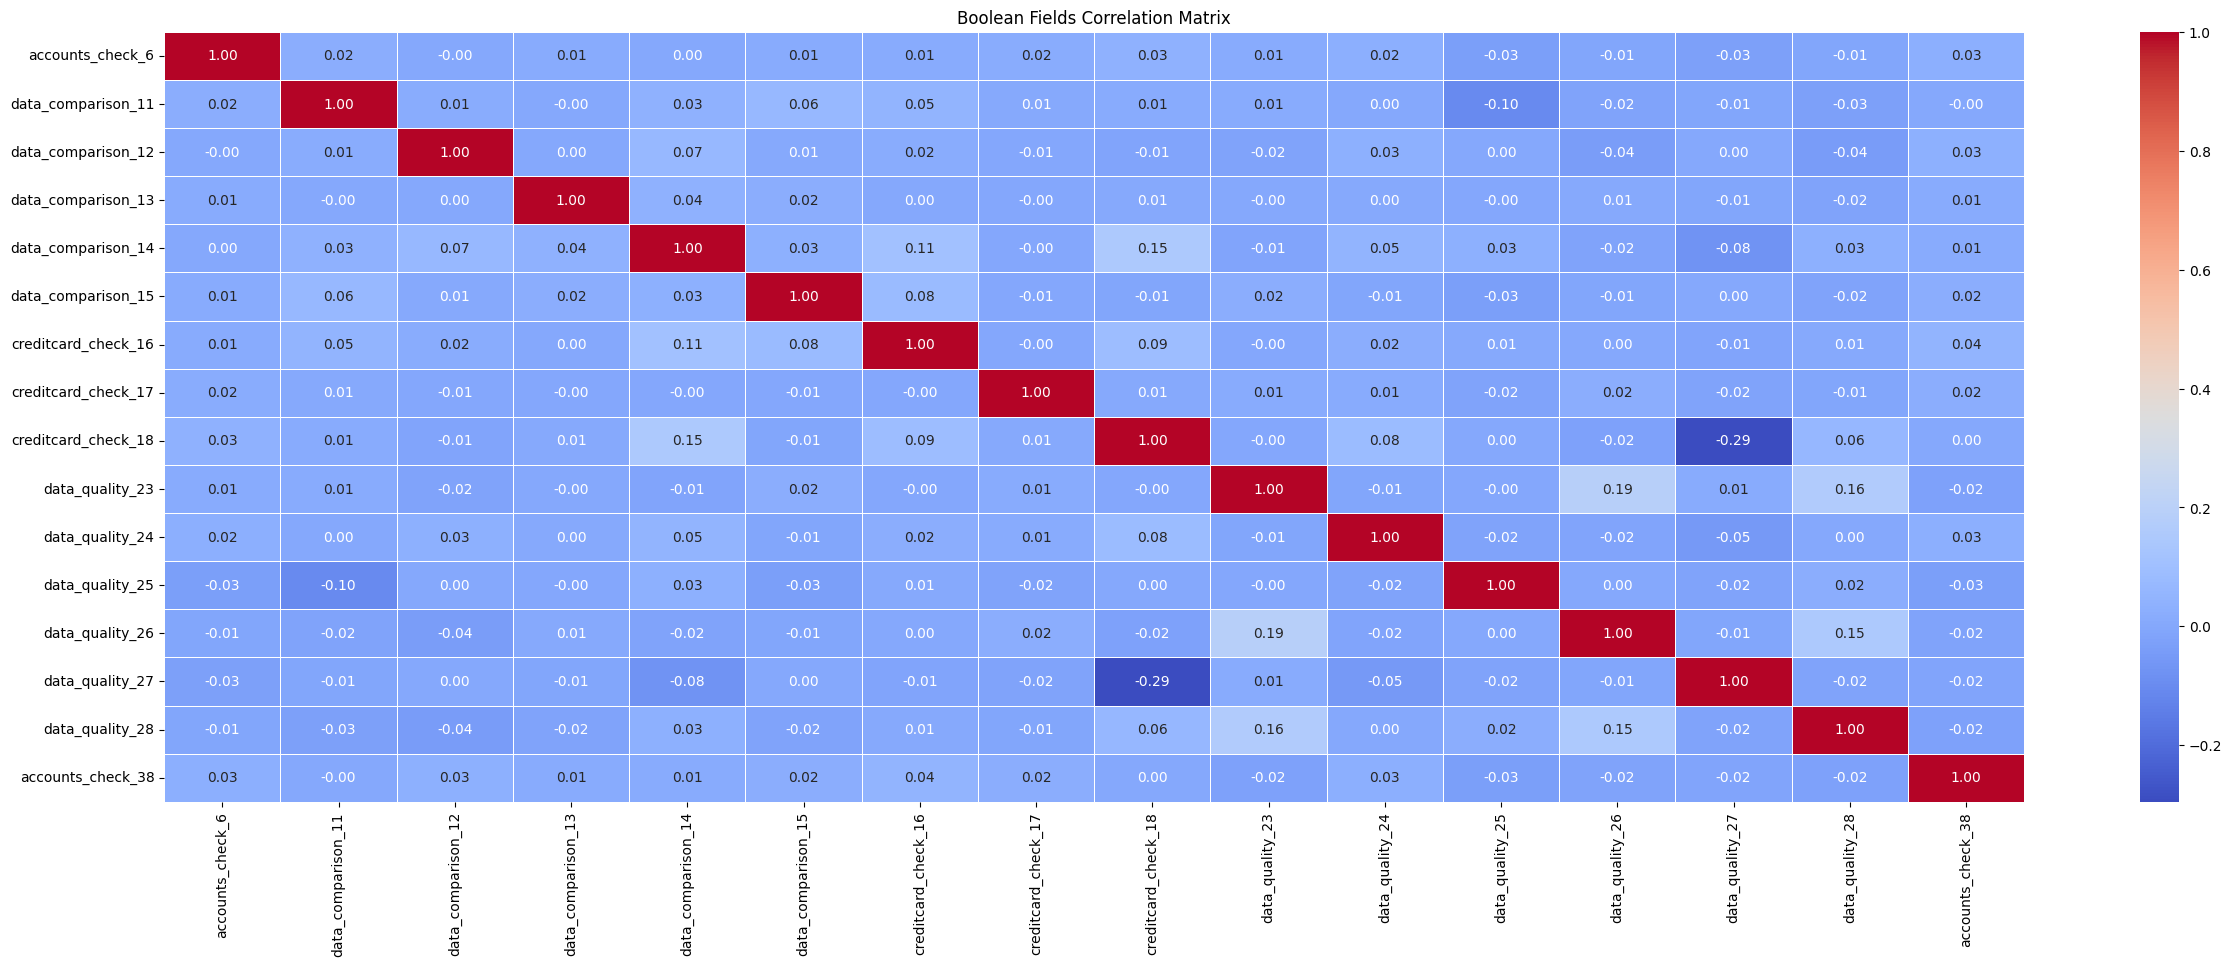

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the size of the figure
plt.figure(figsize=(30, 10))

# Calculate the correlation matrix
boolean_data = data[boolean_features]
corr_matrix = boolean_data.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title of the heatmap
plt.title('Boolean Fields Correlation Matrix')

# Show the plot
plt.show()


In [370]:
import plotly.express as px
import plotly.graph_objects as go

# Calculate the correlation matrix
boolean_data = data[boolean_features]
corr_matrix = boolean_data.corr()

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmin=-1,  # Set the range for color scale
    zmax=1,
    colorbar=dict(title='Correlation'),
    text=corr_matrix.round(2).values,  # Display rounded correlation values on the heatmap
    texttemplate="%{text}",  # Display text in the heatmap cells
    textfont=dict(size=12, color='black')  # Adjust text size and color
))

# Update layout
fig.update_layout(
    title='Boolean Fields Correlation Matrix',
    xaxis_title='Boolean Features',
    yaxis_title='Boolean Features',
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels for better readability
    yaxis=dict(tickangle=0),    # Ensure y-axis labels are upright
    autosize=True  # Adjust size to fit the content
)

# Show the figure
fig.show()


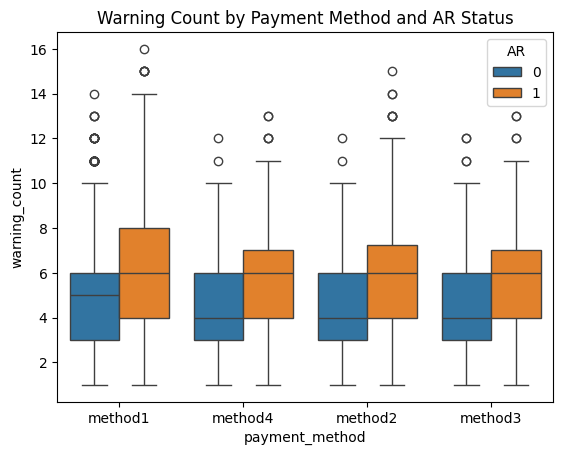

In [371]:
# Numerical and Categorical
sns.boxplot(x='payment_method', y='warning_count', hue='AR', data=data)
plt.title('Warning Count by Payment Method and AR Status')
plt.show()


In [372]:
#Create a pivot table for education and income with average claim rate as values
# pivot_table = pd.pivot_table(data=data,index=['client_first_lapp_mark','client_first_manual_lapp_mark'],columns='payment_method',values='AR',aggfunc='mean')
# pivot_table = pd.pivot_table(data=data,index='client_first_lapp_mark',columns='client_first_manual_lapp_mark',values='AR',aggfunc='mean')
# pivot_table


In [373]:
# plt.figure(figsize=[8,5])
# sns.heatmap(pivot_table,annot=True,cmap='coolwarm',linewidths=.5)
# plt.title("Education Level and Income Class")
# plt.show()

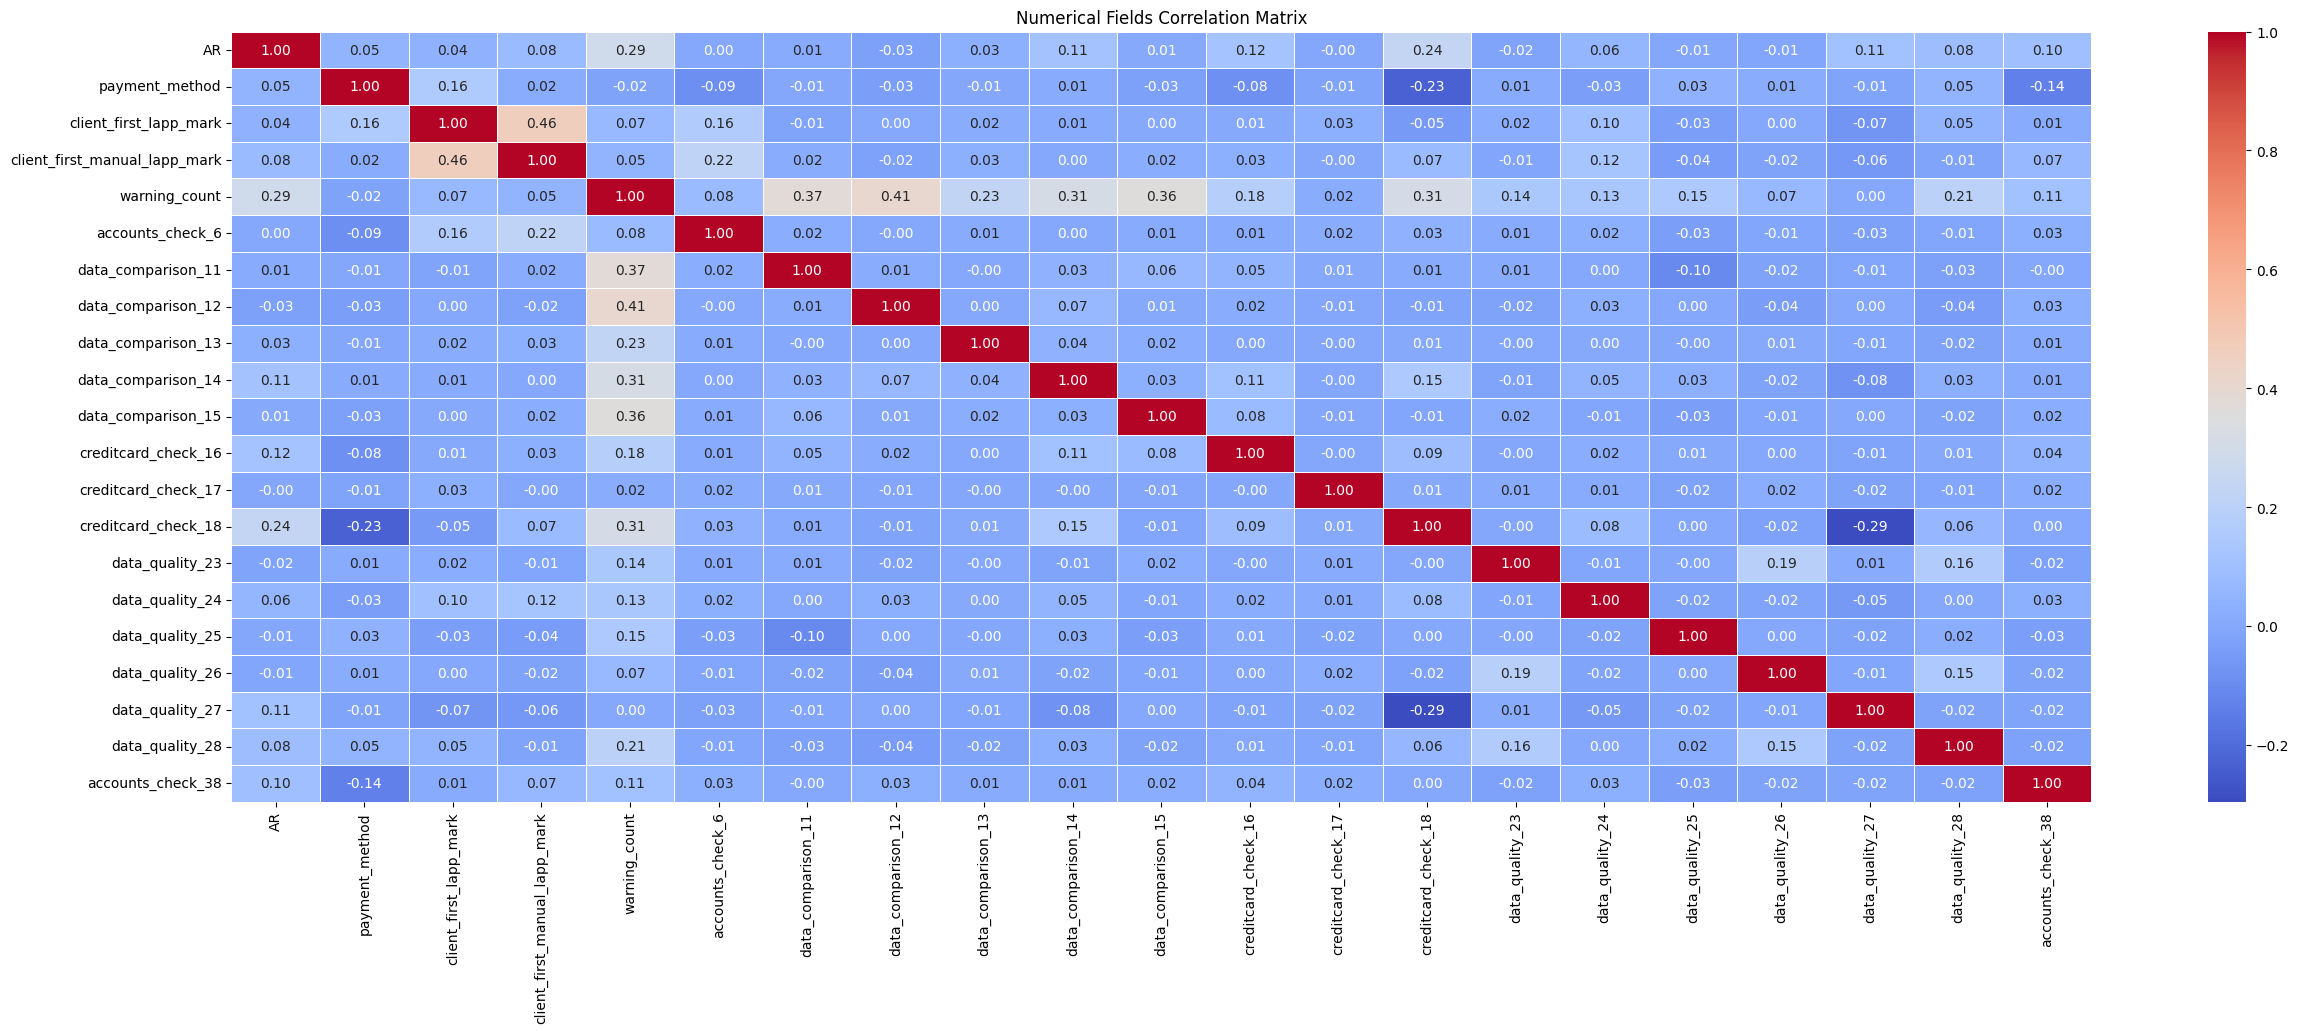

In [374]:
corr_df=data.copy()
corr_df["AR"] = corr_df["AR"].astype("int64")
payment_method_mapping = {
    'method1': 1,
    'method2': 2,
    'method3': 3,
    'method4': 4
}

client_first_mapping = {
    'yes': 1,
    'no': 2,
}
# label_encoder = LabelEncoder()
# corr_df['payment_method']= label_encoder.fit_transform(corr_df['payment_method'])
# corr_df['client_first_lapp_mark']= label_encoder.fit_transform(corr_df['client_first_lapp_mark'])
# corr_df['client_first_manual_lapp_mark']= label_encoder.fit_transform(corr_df['client_first_manual_lapp_mark'])

corr_df['payment_method'] = corr_df['payment_method'].map(payment_method_mapping)
corr_df['client_first_lapp_mark'] = corr_df['client_first_lapp_mark'].map(client_first_mapping)
corr_df['client_first_manual_lapp_mark'] = corr_df['client_first_manual_lapp_mark'].map(client_first_mapping)

corr_df=pd.get_dummies(corr_df,dtype='int64')
corr_df[boolean_features] = corr_df[boolean_features].astype("int64")

# numerical_features=get_numerical_columns(corr_df)


# Define the size of the figure
plt.figure(figsize=(30, 10))

# Calculate the correlation matrix
numerical_data = corr_df

corr_matrix = numerical_data.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title of the heatmap
plt.title('Numerical Fields Correlation Matrix')

# Show the plot
plt.show()



In [375]:
corr_matrix['AR'].sort_values(ascending=False)

AR                               1.000000
warning_count                    0.288165
creditcard_check_18              0.236820
creditcard_check_16              0.116787
data_comparison_14               0.111565
data_quality_27                  0.105229
accounts_check_38                0.099393
data_quality_28                  0.084676
client_first_manual_lapp_mark    0.078114
data_quality_24                  0.055244
payment_method                   0.047336
client_first_lapp_mark           0.038801
data_comparison_13               0.028304
data_comparison_11               0.010883
data_comparison_15               0.006909
accounts_check_6                 0.002334
creditcard_check_17             -0.003210
data_quality_25                 -0.006475
data_quality_26                 -0.010012
data_quality_23                 -0.016639
data_comparison_12              -0.031514
Name: AR, dtype: float64

## Findings Based on Correlation Coefficients

### Correlation Insights:
- **Positive Correlations:**
  - Variables such as `warning_count` (0.288), `creditcard_check_18` (0.237), and `creditcard_check_16` (0.117) show positive correlations with the `AR` target. These variables have higher coefficients and are more likely to have a meaningful relationship with the AR.
  - Other variables with positive but lower coefficients include `data_comparison_14`, `data_quality_27`, `accounts_check_38` ,`data_quality_28`,`client_first_manual_lapp_mark`,`data_quality_24`,`payment_method`,`client_first_lapp_mark`,`data_comparison_13`,`data_comparison_11`,`data_comparison_15`,`accounts_check_6`.

- **Negative Correlations:**
  - Variables with negative coefficients, such as `creditcard_check_17` (-0.003), `data_quality_25` (-0.006), `data_quality_26` (-0.010), `data_quality_23` (-0.017), and `data_comparison_12` (-0.032), indicate a weaker or potentially inverse relationship with the AR.

### Recommendations:

1. **Columns to Consider Removing:**
   - **Columns with Coefficients ≤ 0:** The following columns have correlation coefficients less than or equal to 0 and may not contribute positively to the model. These include:
     - `creditcard_check_17` (-0.003)
     - `data_quality_25` (-0.006)
     - `data_quality_26` (-0.010)
     - `data_quality_23` (-0.017)
     - `data_comparison_12` (-0.032)

   - **Rationale:** Since these variables show either a very weak or negative relationship with the AR, they may add noise or complexity to the model without providing meaningful predictive power. Removing these columns could simplify the model and potentially improve its performance.

2. **Columns to Retain:**
   - **Columns with Positive Coefficients:** Retain variables with positive coefficients, especially those with higher values, such as:
      - `warning_count` (0.288165)
      - `creditcard_check_18` (0.236820)
      - `creditcard_check_16` (0.116787)
      - `data_comparison_14` (0.111565)
      - `data_quality_27` (0.105229)
      - `accounts_check_38` (0.099393)
      - `data_quality_28` (0.084676)
      - `client_first_manual_lapp_mark` (0.078114)
      - `data_quality_24` (0.055244)
      - `payment_method` (0.047336)
      - `client_first_lapp_mark` (0.038801)
     
   - **Rationale:** These variables show a more meaningful positive correlation with the approval rate and are likely to provide useful information for predicting approvals.

In summary, consider removing columns with coefficients less than or equal to 0 as they may not contribute positively to the model. Focus on retaining and potentially further exploring variables with positive coefficients to enhance the model's predictive accuracy.


## Feature selection

In [376]:


# Assume 'data' is your DataFrame and 'X' is the feature matrix, 'y' is the target variable
from sklearn.feature_selection import SelectKBest, f_classif


X = corr_df.drop(columns=['AR'])
y = data['AR']

# Select top 10 features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected features:", selected_features)


Selected features: Index(['payment_method', 'client_first_manual_lapp_mark', 'warning_count',
       'data_comparison_14', 'creditcard_check_16', 'creditcard_check_18',
       'data_quality_24', 'data_quality_27', 'data_quality_28',
       'accounts_check_38'],
      dtype='object')


## Findings from SelectKBest Feature Selection

### Selected Features
The following features were identified as most relevant to the target variable (`AR`) based on the SelectKBest algorithm:

- **`payment_method`**
- **`client_first_manual_lapp_mark`**
- **`warning_count`**
- **`data_comparison_14`**
- **`creditcard_check_16`**
- **`creditcard_check_18`**
- **`data_quality_24`**
- **`data_quality_27`**
- **`data_quality_28`**
- **`accounts_check_38`**

### Summary of Findings
- **Payment Method:** The payment method is crucial in determining the approval status, indicating that different payment methods have a significant impact on the likelihood of loan approval.
- **Client First Manual Application Mark:** Whether the client's first loan application reached the manual processing stage is an important factor, suggesting that manual reviews might affect approval outcomes.
- **Warning Count:** The number of warnings associated with an application is relevant, implying that higher warning counts may influence approval decisions.
- **Data Comparison Columns:** Features related to data comparison, such as `data_comparison_14`, are important, indicating that discrepancies or comparisons in data can affect approval.
- **Credit Card Checks:** Features related to credit card checks (`creditcard_check_16`, `creditcard_check_18`) are significant, showing that credit card information plays a role in the approval process.
- **Data Quality Columns:** The quality of data columns (`data_quality_24`, `data_quality_27`, `data_quality_28`) are relevant, suggesting that data quality impacts approval decisions.
- **Accounts Check Column:** The `accounts_check_38` feature is important, highlighting that account checks are a significant determinant in loan approval.

These findings suggest that both categorical and boolean features, along with numerical indicators like `warning_count`, play a crucial role in predicting loan approval. 


## Chi-Square Test for Categorical Variables

In [377]:
import pandas as pd
from scipy.stats import chi2_contingency

for category in categorical_features:
    if category != "AR":

        # Assuming you have a DataFrame df with categorical variables
        contingency_table = pd.crosstab(corr_df[category],corr_df['AR'])

        # Perform Chi-Square test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        print(f'Chi-Square Statistic: {chi2}')
        print(f'p-value: {p}')

        # Interpretation
        if p < 0.05:
            print('The association between AR and '+category+' is statistically significant.')
        else:
            print('The association between the variables is not statistically significant.')
        print()


Chi-Square Statistic: 76.24093389510546
p-value: 1.9638757371300697e-16
The association between AR and payment_method is statistically significant.

Chi-Square Statistic: 14.738427043537198
p-value: 0.00012350327766851257
The association between AR and client_first_lapp_mark is statistically significant.

Chi-Square Statistic: 59.966934296524244
p-value: 9.646443822599409e-15
The association between AR and client_first_manual_lapp_mark is statistically significant.



In [379]:
selected_features=['payment_method', 'client_first_manual_lapp_mark', 'warning_count',
       'data_comparison_14', 'creditcard_check_16', 'creditcard_check_18',
       'data_quality_24', 'data_quality_27', 'data_quality_28',
       'accounts_check_38','client_first_lapp_mark',"AR"]

selected_data=data[selected_features]
selected_data

,payment_method,client_first_manual_lapp_mark,warning_count,data_comparison_14,creditcard_check_16,creditcard_check_18,data_quality_24,data_quality_27,data_quality_28,accounts_check_38,client_first_lapp_mark,AR
0,method1,yes,2,False,False,False,False,True,False,False,yes,0
1,method1,yes,2,False,False,False,False,False,False,False,no,0
2,method1,yes,6,False,False,False,False,False,True,False,no,0
3,method1,yes,7,False,False,False,False,False,False,False,no,0
4,method1,no,5,False,False,True,False,False,False,False,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9893,method1,yes,5,False,False,False,False,True,False,False,yes,0
9894,method1,yes,3,False,False,False,True,True,False,False,no,0
9895,method1,yes,7,False,False,True,False,False,False,True,no,0
9896,method1,yes,3,False,False,False,False,False,False,False,yes,0


In [380]:
data.to_csv("../data/processed/data_features_selected.csv",index=False)